<a href="https://colab.research.google.com/github/khalidpark/deeplearning_whitepaper/blob/main/deep_learning_whitepaper_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np

# 학습데이터를 생성합니다
np.random.seed(827)

# 입력 벡터: [x0, x1]
# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[1, 1]
    ,[1, 0]
    ,[0, 1]
])

# bias
b = 1

# Y: 타겟값(correct outputs)
Y= np.array([[0],[1],[1],[1]])


In [12]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
    return 1 / (1 + np.exp(-net))

# 시그모이드 함수의 도함수 유도 예시
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig * (1 - sig)


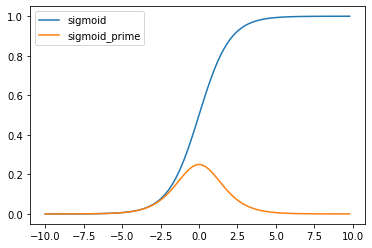

In [13]:
import matplotlib.pyplot as plt

# 시그모이드 함수 그래프 생성
x_range = np.arange(-10., 10., 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid') 
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.legend()
plt.show();


In [14]:
#초기 가중치는 무작위(Random)

# W: [weight0, weight1]
W = 2 * np.random.rand(2,1) - 1
W


array([[-0.36561912],
       [-0.48951912]])

In [15]:
#입력데이터와 가중치 연산

# Z: 가중합
Z = np.dot(X, W) + b
Z


array([[1.        ],
       [0.14486176],
       [0.63438088],
       [0.51048088]])

In [16]:
#활성화 함수를 사용해 학습군(epoch)의 출력
# A: 출력(activated outputs)
A = sigmoid(Z)
A

array([[0.73105858],
       [0.53615224],
       [0.65348215],
       [0.6249192 ]])

In [17]:
#출력 오차를 줄이기 위한 역전파(경사하강법 이용)

# da: 에러값,  dE/da
# dz: dE/dz
# dw: 가중치 업데이트 값 
# db: bias 업데이트 값
da = A - Y
dz = da * sigmoid_prime(Z)
dw = np.dot(X.T, dz)
db = np.sum(da, keepdims=True)

print(dw)
print(db)


[[-0.19382232]
 [-0.20327284]]
[[-0.45438783]]


In [18]:
X.T


array([[0, 1, 1, 0],
       [0, 1, 0, 1]])

In [19]:
dz


array([[ 0.14373484],
       [-0.1153557 ],
       [-0.07846662],
       [-0.08791714]])

In [20]:
db

array([[-0.45438783]])

In [21]:
print('기존 가중치: \n',W)


기존 가중치: 
 [[-0.36561912]
 [-0.48951912]]


In [22]:
# 가중치 업데이트(batch)
W += dw
b += db


In [23]:
print('업데이트 후 가중치: \n', W)
print('업데이트 후 bias: \n', b)


업데이트 후 가중치: 
 [[-0.55944144]
 [-0.69279195]]
업데이트 후 bias: 
 [[0.54561217]]


반복(iteration)을 통한 정교한 가중치 생성¶


In [24]:
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언 하였습니다.

# 가중치 초기화
# W = 2 * np.random.random((2,1)) - 1
W = np.random.randn(2,1)
# W = np.zeros((2,1))

b = 0

print('학습 전 가중치: \n', W)

# 가중치 업데이트를 10,000회 (10,000 epoch) 진행하겠습니다.

for iteration in range(1000):

    # 순방향 전파
    Z = np.dot(X, W) + b
    A = sigmoid(Z)

    # 역방향 전파(기울기 계산)
    da = Y - A
    dz = da * sigmoid_prime(Z)
    dw = np.dot(X.T, dz)
    db = np.sum(da, keepdims=True)
    
    W += dw
    b += db

print('학습 후 가중치: \n', W)
print('학습 후 bias: \n', b)
print('학습 후 예측값: \n', A.round(3))


학습 전 가중치: 
 [[-0.26203003]
 [ 0.47949834]]
학습 후 가중치: 
 [[5.92195632]
 [5.9220684 ]]
학습 후 bias: 
 [[-2.5909238]]
학습 후 예측값: 
 [[0.07 ]
 [1.   ]
 [0.965]
 [0.965]]
